In [5]:
from modules.DLA_model import Diffusion, compare_omegas, plot_omega_comparison
from joblib import Parallel, delayed

## Test various $\eta$

We test 3 values of $\eta$, $0, 1, 2$, run $200$ growth iterations and the default value of $\omega = 1.8$.

We plot the resulting cluster and concentration of the grid cells.

Disclamer: execution of the following cell takes around 

In [9]:
grid_size = 100
growth_iterations = 200

def run_simulation_and_plot(eta):
    diffusion = Diffusion(grid_size, eta, initial_point="bottom")
    diffusion.run_simulation(growth_iterations)
    diffusion.plot(save=True, filename=f"diffusion_eta_{eta}_200.png")

_ = Parallel(n_jobs=-2)(
        delayed(run_simulation_and_plot)(eta) for eta in [0, 1, 2]
    )

Figure(640x480)
Figure(640x480)
Figure(640x480)


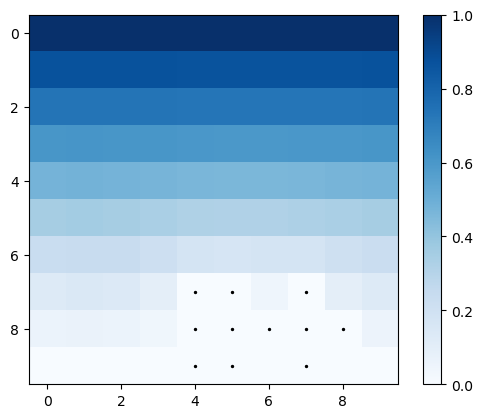

In [ ]:
grid_size = 100
eta = 0
growth_iterations = 200

diffusion = Diffusion(grid_size, eta, initial_point="bottom")
diffusion.run_simulation(growth_iterations)
diffusion.plot(save=True, filename="diffusion_eta_0_200.png")

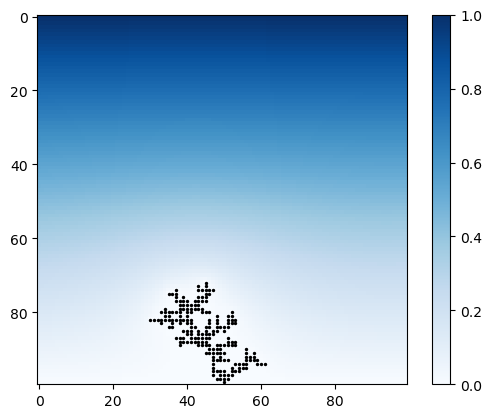

<Figure size 640x480 with 0 Axes>

In [3]:
grid_size = 100
eta = 1
growth_iterations = 200

diffusion = Diffusion(grid_size, eta, initial_point="bottom")
diffusion.run_simulation(growth_iterations)
diffusion.plot(save=True, filename="diffusion_eta_1_200.png")

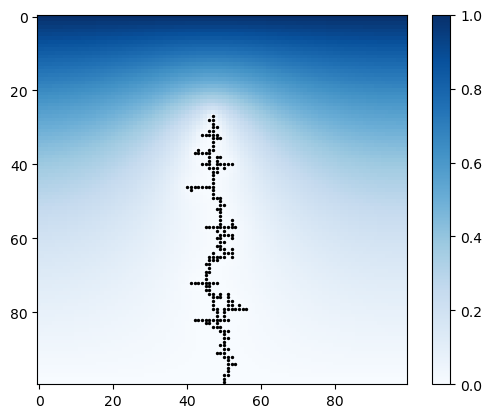

<Figure size 640x480 with 0 Axes>

In [4]:
grid_size = 100
eta = 2
growth_iterations = 200

diffusion = Diffusion(grid_size, eta, initial_point="bottom")
diffusion.run_simulation(growth_iterations)
diffusion.plot(save=True, filename="diffusion_eta_2_200.png")

# Find optimal value of $\omega$

Next, we try to find the approximate optimal value of $\omega$ for the three values of $\eta = 0, 1, 2$.

We start with initial guess of $\omega = 1, 1.4, 1.8, 1.9$ and run $20$ simulations with $50$ growth iterations for each combination of $\omega$ and $\eta$.

During each growth step, we solve the Lapsal equation using the SOR method and we check the number of iterations we had to do for SOR to converge. We then measure the performance of each $\omega$ by checking the total number of iterations we had to do in SOR and plot the results.

Disclamer: execution of each of the three following cells can take up to 30 minutes.

In [ ]:
eta = 0
omegas = [1.0, 1.4, 1.8, 1.9]
num_simulations = 20

results = compare_omegas(eta, omegas, num_simulations)
plot_omega_comparison(results, omegas, eta, save=True, filename="omega_comparison_eta_0.png")

In [ ]:
eta = 1
omegas = [1.0, 1.4, 1.8, 1.9]
num_simulations = 20

results = compare_omegas(eta, omegas, num_simulations)
plot_omega_comparison(results, omegas, eta, save=True, filename="omega_comparison_eta_1.png")

In [ ]:
eta = 2
omegas = [1.0, 1.4, 1.8, 1.9]
num_simulations = 20

results = compare_omegas(eta, omegas, num_simulations)
plot_omega_comparison(results, omegas, eta, save=True, filename="omega_comparison_eta_2.png")

Given the results from above, we redefine our guesses for $\omega$ and simulate again.

Disclaimer: execution of each of the three following cells can take up to 15 minutes.

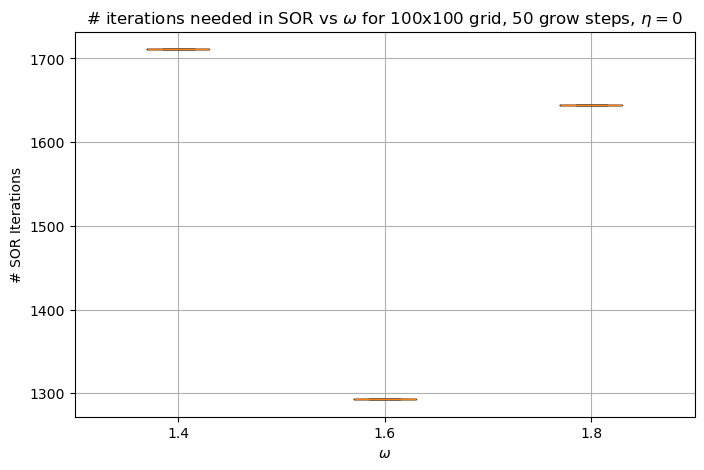

In [3]:
eta = 0
omegas = [1.4, 1.6, 1.8]
num_simulations = 1

results = compare_omegas(eta, omegas, num_simulations)
plot_omega_comparison(results, omegas, eta, save=True, filename="omega_comparison_eta_0_v2.png")

In [6]:
eta = 1
omegas = [1.75, 1.8, 1.85]
num_simulations = 20

results = compare_omegas(eta, omegas, num_simulations)
plot_omega_comparison(results, omegas, eta, save=True, filename="omega_comparison_eta_1_v2.png")

KeyboardInterrupt: 

In [ ]:
eta = 2
omegas = [1.8, 1.85, 1.9]
num_simulations = 20

results = compare_omegas(eta, omegas, num_simulations)
plot_omega_comparison(results, omegas, eta, save=True, filename="omega_comparison_eta_2.png")